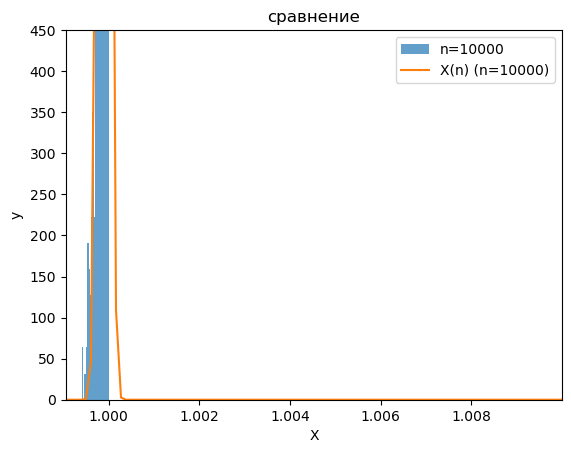

In [2]:
#1a
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci

T = 1
n = 10000

samples = np.random.uniform(0, T, size=(n, n))
max_values = np.max(samples, axis=1)

plt.hist(max_values, bins=300, density=1, alpha=0.7, label=f'n={n}')

mu = max_values.mean()
sigma = max_values.std()

x = np.linspace(min(max_values), max(max_values)+0.01, 100)
y = sci.norm.pdf(x, mu, sigma)
plt.plot(x, y, label=f'X(n) (n={n})')

plt.xlim(min(max_values),max(max_values) + 0.01)
plt.ylim(0, 450)

plt.title('сравнение')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [3]:
#1b
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def For_b(N, array, T):
    return N * (T - array)

def plot_density(n):
    samples = np.random.uniform(0, T, size=(n, n))
    max_values = np.max(samples, axis=1)
    plt.figure(figsize = (6,10))
    plt.hist(For_b(n, max_values, T), bins = 700, density = True, color = 'green')
    x = np.linspace(min(For_b(n, max_values, T))-2, max(For_b(n, max_values, T)), 1000)
    plt.plot(x, sci.expon(1).pdf(x+mu), color='red', linewidth = 3)
    plt.xlim(min(For_b(n, max_values, T)) - 2, max(For_b(n, max_values, T)) + 0.5)
    plt.show()


n_slider = widgets.IntSlider(min=100, max=10000, step=100, value=700)

interactive_plot = widgets.interactive(plot_density, n=n_slider)

display(interactive_plot)

interactive(children=(IntSlider(value=700, description='n', max=10000, min=100, step=100), Output()), _dom_cla…

# 1-d)

Max estimate is closer to theta. Counter: 805


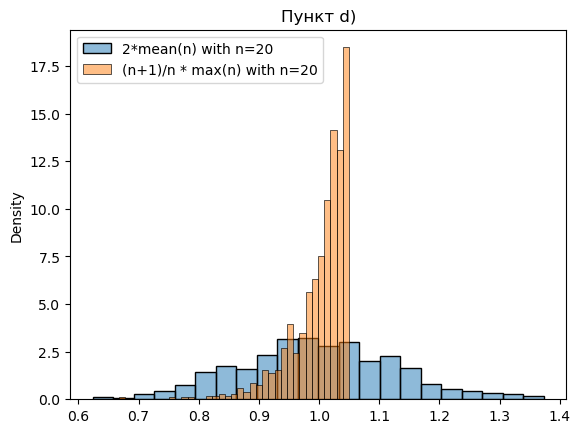

In [20]:
#1.d
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import scipy.stats as scst
import scipy as sc
import seaborn as sns

def task_d(n:int, k:int, theta:float):
    rvsUniform = scst.uniform(loc = 0, scale = theta).rvs
    MatrixUniform = sc.sparse.random(k,n, density=1, data_rvs = rvsUniform).toarray()
    UniformMean = []
    UniformMax = []
    for i in range (k):
        UniformMean.append(MatrixUniform[i][:].mean())
        UniformMax.append(MatrixUniform[i][:].max())
    np.array(UniformMean)
    Result1 = np.array([2*x for x in UniformMean])
    Result2 = np.array([(n+1)/n * x for x in UniformMax])
    counter = 0
    for m in range (k):
        if (np.absolute(Result1[m] - theta) <= np.absolute(Result2[m]-theta)):
            counter += 1
        else:
            continue
    if (counter >= k - counter):
        print("Mean estimate is closer to theta. Counter: %d"%counter)
    else:
        print("Max estimate is closer to theta. Counter: %d"%(1000 - counter))
    ax = sns.histplot(Result1, kde = False, stat='density',alpha = 0.5, label = "2*mean(n) with n=%d"%n)
    ax = sns.histplot(Result2, kde = False, stat='density',alpha = 0.5, label = "(n+1)/n * max(n) with n=%d"%n)
    ax.set_title("Пункт d)")
    ax.legend()
task_d(20,1000,1)

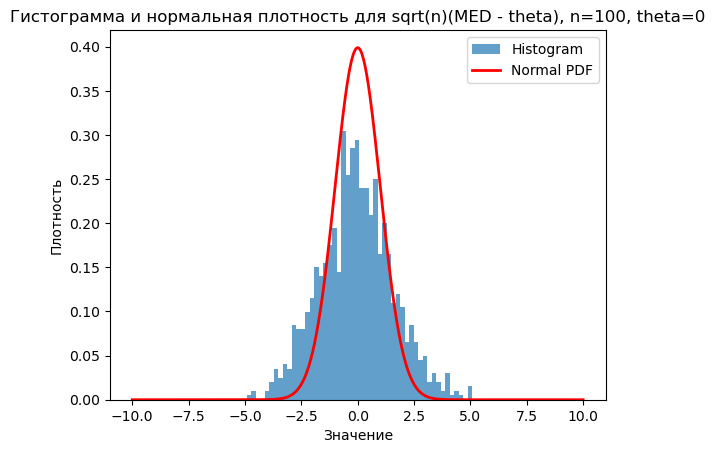

In [10]:
#3

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, norm

def sqrt_n_MED_minus_theta(n, theta, num_samples=1000):

    samples = cauchy.rvs(loc=theta, size=(num_samples, n))
    
    medians = np.median(samples, axis=1)
    
    # sqrt(n) * (MED - theta)
    sqrt_n_MED_minus_theta = np.sqrt(n) * (medians - theta)
    
    return sqrt_n_MED_minus_theta

def plot_histogram(n, theta):

    data = sqrt_n_MED_minus_theta(n, theta)
    
    plt.hist(data, bins=50, density=True, alpha=0.7, label='Histogram')
    
    x = np.linspace(-10, 10, 1000)
    normal_pdf = norm.pdf(x, loc=0, scale=1) 
    plt.plot(x, normal_pdf, 'r-', lw=2, label='Normal PDF')
    
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма и нормальная плотность для sqrt(n)(MED - theta), n={n}, theta={theta}')
    plt.legend()
    
    plt.show()

plot_histogram(100, 0)


0.0
NO


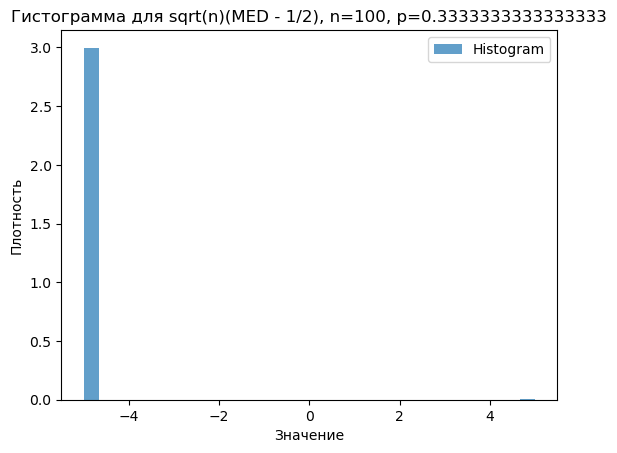

0.0
NO


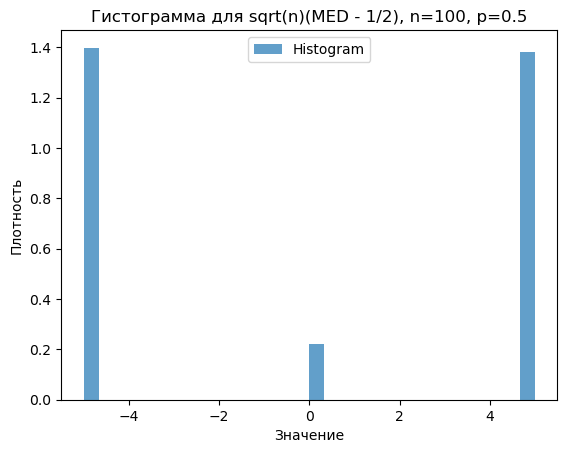

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm

def sqrt_n_MED_minus_half(n, p, num_samples=1000):

    samples = bernoulli.rvs(p, size=(num_samples, n))
    
    medians = np.median(samples, axis=1)
    
    # sqrt(n) * (MED - 1/2)
    sqrt_n_MED_minus_half = np.sqrt(n) * (medians - 1/2)
    
    return sqrt_n_MED_minus_half

def plot_histogram(n, p):

    data = sqrt_n_MED_minus_half(n, p)
    

    plt.hist(data, bins=30, density=True, alpha=0.7, label='Histogram')
    
    
    mean = data.mean()
    print(sci.bernoulli.cdf(mean, p))

    if(sci.bernoulli.cdf(mean, p) > 0.5):
        print('YES')
    else:
        print('NO')
    
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.title(f'Гистограмма для sqrt(n)(MED - 1/2), n={n}, p={p}')
    plt.legend()
    plt.show()

plot_histogram(100, 1/3)
plot_histogram(100, 1/2)


# 4

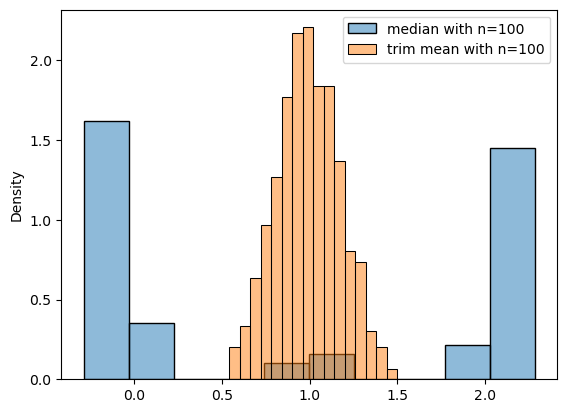

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scst

def generate_mean(n:int,k:int, theta:float):
    MatrixUniform = np.zeros(shape=(k,n))
    for i in range (k):
        for m in range (n):
            p = scst.bernoulli.rvs(p=1/2, size=1)
            if p == 1:
                MatrixUniform[i][m] = scst.uniform.rvs(loc = theta - 2, scale = 1, size = 1)
            else:
                MatrixUniform[i][m] = scst.uniform.rvs(loc = theta + 1, scale = 1, size = 1)
    UniformMedian = []
    TrimMean = []
    alpha = 0.1
    for i in range (k):
        UniformMedian.append(np.median(MatrixUniform[i][:]))
        TrimMean = np.append(TrimMean, scst.trim_mean(MatrixUniform[i][:],proportiontocut=alpha))
    np.array(UniformMedian)
    np.array(TrimMean)
    ax = sns.histplot(UniformMedian, kde = False, stat='density',alpha = 0.5, label = "median with n=%d"%n)
    ax = sns.histplot(TrimMean, kde = False, stat='density',alpha = 0.5, label = "trim mean with n=%d"%n)
    ax.legend()
generate_mean(100,500,1)


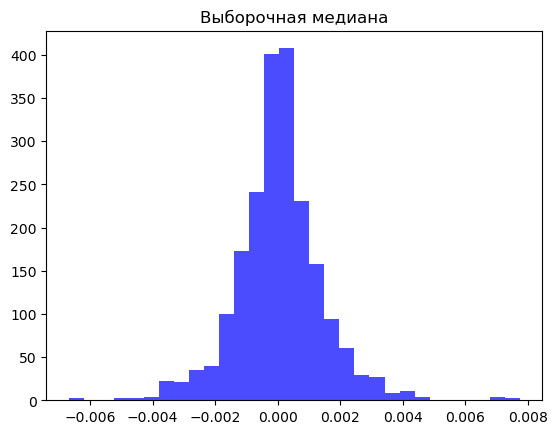

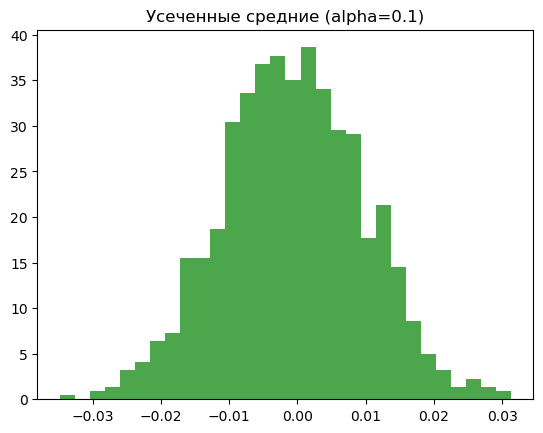

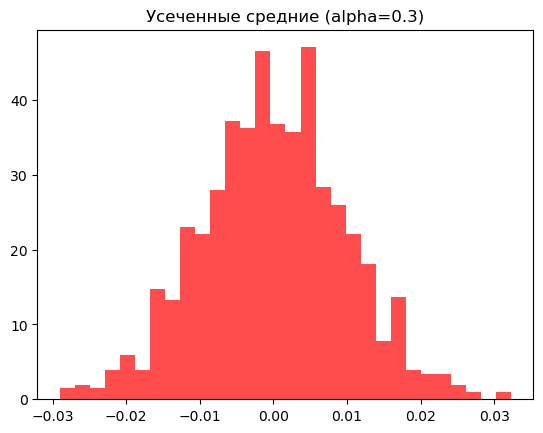

In [45]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Для воспроизводимости результатов

# Генерация выборки
def generate_sample(theta, n):
    lower_interval = [theta - 2, theta - 1]
    upper_interval = [theta + 1, theta + 2]
    sample = np.concatenate([np.random.uniform(lower_interval[0], lower_interval[1], n // 2),
                             np.random.uniform(upper_interval[0], upper_interval[1], n // 2)])
    return sample

# Выборочная медиана
def sample_median(sample):
    return np.median(sample)

# Усеченные средние
def truncated_means(sample, alpha):
    lower_alpha = int(alpha * len(sample))
    upper_alpha = int((1 - alpha) * len(sample))
    truncated_sample = np.sort(sample)[lower_alpha:upper_alpha]
    return np.mean(truncated_sample)

# Параметры
theta = 0  # Истинное значение параметра
sample_size = 1000  # Размер выборки

# Симуляция выборки
sample = generate_sample(theta, sample_size)

# Состоятельность и асимптотическая нормальность выборочной медианы
medians = [sample_median(generate_sample(theta, sample_size)) for _ in range(1000)]
plt.hist(medians, bins=30, density=True, alpha=0.7, color='blue')
plt.title('Выборочная медиана')
plt.show()

# Состоятельность и асимптотическая нормальность усеченных средних (например, alpha=0.1)
truncated_means_01 = [truncated_means(generate_sample(theta, sample_size), alpha=0.1) for _ in range(1000)]
plt.hist(truncated_means_01, bins=30, density=True, alpha=0.7, color='green')
plt.title('Усеченные средние (alpha=0.1)')
plt.show()

# Состоятельность и асимптотическая нормальность усеченных средних (например, alpha=0.3)
truncated_means_03 = [truncated_means(generate_sample(theta, sample_size), alpha=0.3) for _ in range(1000)]
plt.hist(truncated_means_03, bins=30, density=True, alpha=0.7, color='red')
plt.title('Усеченные средние (alpha=0.3)')
plt.show()


Медиана: 0.0023230045182561494
Выборочное среднее: 0.011280168256080556
X_alpha для alpha=0.1: -1.5441741359492198
X_alpha для alpha=0.3: -0.5532029675598125


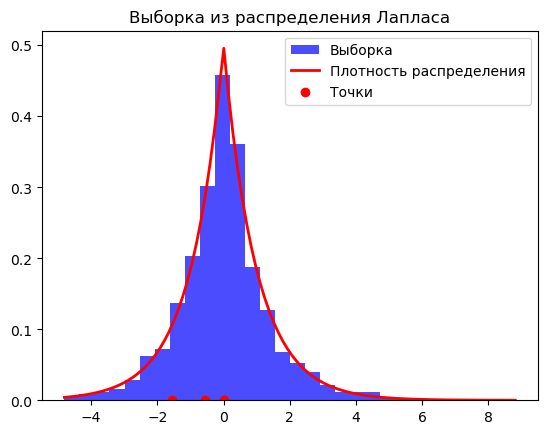

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Параметры  Лапласа
mu = 0
b = 1
sample_size = 1000

#  выборки из Лапласа
laplace_data = laplace.rvs(loc=mu, scale=b, size=sample_size)

median = np.median(laplace_data)
sample_mean = np.mean(laplace_data)
alpha_01 = np.percentile(laplace_data, 10)
alpha_03 = np.percentile(laplace_data, 30)

print(f"Медиана: {median}")
print(f"Выборочное среднее: {sample_mean}")
print(f"X_alpha для alpha=0.1: {alpha_01}")
print(f"X_alpha для alpha=0.3: {alpha_03}")

plt.hist(laplace_data, bins=30, density=True, alpha=0.7, color='blue', label='Выборка')

x = np.linspace(min(laplace_data), max(laplace_data), 100)
pdf = laplace.pdf(x, loc=mu, scale=b)
plt.plot(x, pdf, 'r-', lw=2, label='Плотность распределения')

# Выделение точек
plt.scatter([median, sample_mean, alpha_01, alpha_03], [0, 0, 0, 0], color='red', marker='o', label='Точки')

plt.title('Выборка из распределения Лапласа')
plt.legend()
plt.show()
